In [1]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
from IPython.display import Image
from yt.units import G
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve_fft, Gaussian2DKernel

%matplotlib inline

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
m1 = fits.open('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_DD0906_momentum.fits')
m2 = fits.open('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_DD0907_momentum.fits')
m3 = fits.open('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_DD0956_momentum.fits')


ds1 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0906/DD0906')
ds2 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0907/DD0907')
ds3 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0956/DD0956')

ms  = [m1, m2, m3]
dss = [ds1, ds2, ds3]


yt : [INFO     ] 2019-01-15 14:58:15,950 Parameters: current_time              = 295.316463725
yt : [INFO     ] 2019-01-15 14:58:15,952 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-15 14:58:15,954 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-15 14:58:15,955 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-15 14:58:15,957 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-15 14:58:15,959 Parameters: current_redshift          = 0.900132268192
yt : [INFO     ] 2019-01-15 14:58:15,960 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-01-15 14:58:15,962 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-01-15 14:58:15,963 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2019-01-15 14:58:15,997 Parameters: current_time              = 295.566463923
yt : [INFO     ] 2019-01-15 14:58:15,999 Parameters: domain_dimensions         = [256 256 2

In [41]:
anchor_xs_box_avg1, anchor_ys_box_avg1, anchor_zs_box_avg1, anchor_vxs_box_avg1, anchor_vys_box_avg1, anchor_vzs_box_avg1, anchor_xs_avg1, anchor_ys_avg1, anchor_zs_avg1, anchor_vxs_avg1, anchor_vys_avg1, anchor_vzs_avg1 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_mm0_sat0.npy')[()]
anchor_xs_box_avg2, anchor_ys_box_avg2, anchor_zs_box_avg2, anchor_vxs_box_avg2, anchor_vys_box_avg2, anchor_vzs_box_avg2, anchor_xs_avg2, anchor_ys_avg2, anchor_zs_avg2, anchor_vxs_avg2, anchor_vys_avg2, anchor_vzs_avg2 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_mm1_sat0.npy')[()]
anchor_xs_box_avg3, anchor_ys_box_avg3, anchor_zs_box_avg3, anchor_vxs_box_avg3, anchor_vys_box_avg3, anchor_vzs_box_avg3, anchor_xs_avg3, anchor_ys_avg3, anchor_zs_avg3, anchor_vxs_avg3, anchor_vys_avg3, anchor_vzs_avg3 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_mm2_sat0.npy')[()]


In [4]:
W1 = yt.YTArray([15, 15, 5], 'kpc')
N = 1024
north_vector = [0,1,0]

cen1 = yt.YTArray([anchor_xs_box_avg1, anchor_ys_box_avg1, anchor_zs_box_avg1], 'kpc')
L1 = yt.YTArray([anchor_vxs_box_avg1, anchor_vys_box_avg1, anchor_vzs_box_avg1], 'km/s')
L1_mag = sqrt(sum(L1**2))
L_n1 = L1/L1_mag
cenS1 = cen1 + yt.YTArray(10, 'kpc') * L_n1

    
    
    

In [5]:
cp1 = ds1.cutting(L1, cenS1, north_vector)
frb1 = cp1.to_frb((15, 'kpc'), N)
vel_1_dens = frb1["gas", "density"]
vel_1_x = frb1["gas", "velocity_x"].in_units('km/s') - L1[0]
vel_1_y = frb1["gas", "velocity_y"].in_units('km/s') - L1[1]
vel_1_z = frb1["gas", "velocity_z"].in_units('km/s') - L1[2]
vel_1_mag = sqrt(vel_1_x**2 + vel_1_y**2 + vel_1_z**2)








yt : [INFO     ] 2019-01-15 14:58:20,127 Making a fixed resolution buffer of (('gas', 'density')) 1024 by 1024
Parsing Hierarchy : 100%|██████████| 4732/4732 [00:00<00:00, 27027.49it/s]
yt : [INFO     ] 2019-01-15 14:58:20,540 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-01-15 14:58:24,843 Making a fixed resolution buffer of (('gas', 'velocity_x')) 1024 by 1024
yt : [INFO     ] 2019-01-15 14:58:25,715 Making a fixed resolution buffer of (('gas', 'velocity_y')) 1024 by 1024
yt : [INFO     ] 2019-01-15 14:58:26,501 Making a fixed resolution buffer of (('gas', 'velocity_z')) 1024 by 1024


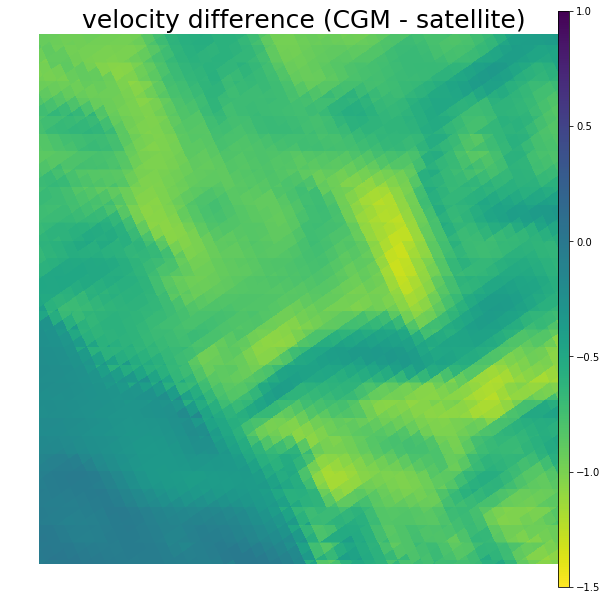

In [13]:
vel_1_dot = (vel_1_x * L1[0] + vel_1_y * L1[1] + vel_1_z * L1[2])/(vel_1_mag * L1_mag)
vel_1_L = -vel_1_mag * vel_1_dot


fig, ax = plt.subplots(1,1, figsize = (8, 8))
im1 = ax.imshow(vel_1_L.value, vmin = -1.5, vmax = 1.0, cmap = cm.viridis_r)


cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")

ax.axis('off')
ax.set_title('velocity difference (CGM - satellite)', fontsize = 25)

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)



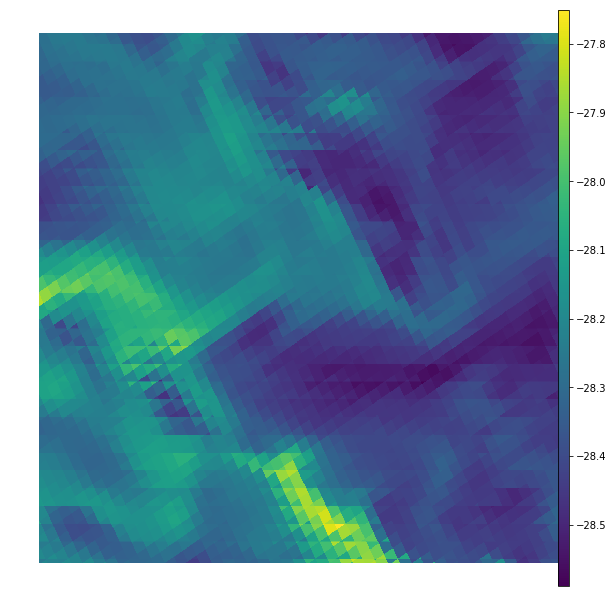

In [14]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
im1 = ax.imshow(log10(vel_1_dens.value))

cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")
ax.axis('off')
fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)



Text(0,0.5,'number')

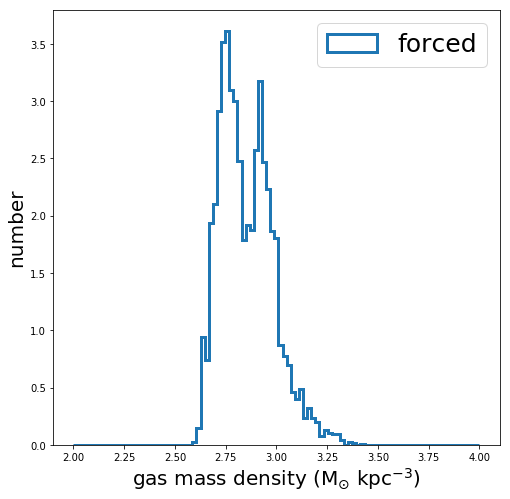

In [17]:
fig, axes = plt.subplots(1,1,figsize = (8,8))

bns = linspace(2,4,100)
axes.hist(log10(vel_1_dens.to('Msun/kpc**3').value.ravel()), label = 'forced', histtype = 'step', linewidth = 3, normed = True, bins = bns)
#axes.set_xlim(-0.05, 6)
legend(fontsize = 25)
axes.set_xlabel(r'gas mass density (M$_{\odot}$ kpc$^{-3}$)', fontsize = 20)
axes.set_ylabel(r'number', fontsize = 20)






In [18]:
ram_pres_1 = vel_1_dens * vel_1_L**2.

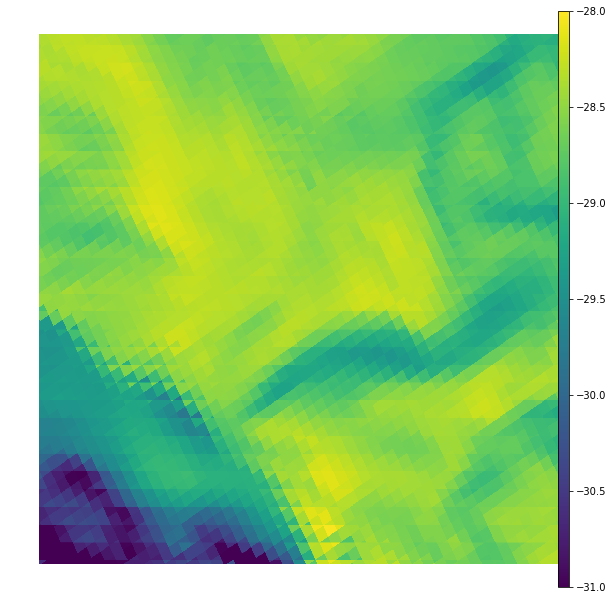

In [30]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
im1 = ax.imshow(log10(ram_pres_1.value), vmin = -31, vmax = -28)

cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")
ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)



In [31]:
sat_dens_1 = yt.off_axis_projection(ds1, cen1, -L_n1, W1, N, ('gas', 'density'), north_vector =  north_vector)
sat_mstar_dens_1 = yt.off_axis_projection(ds1, cen1, -L_n1, W1, N, ('deposit', 'io_density'), north_vector =  north_vector)

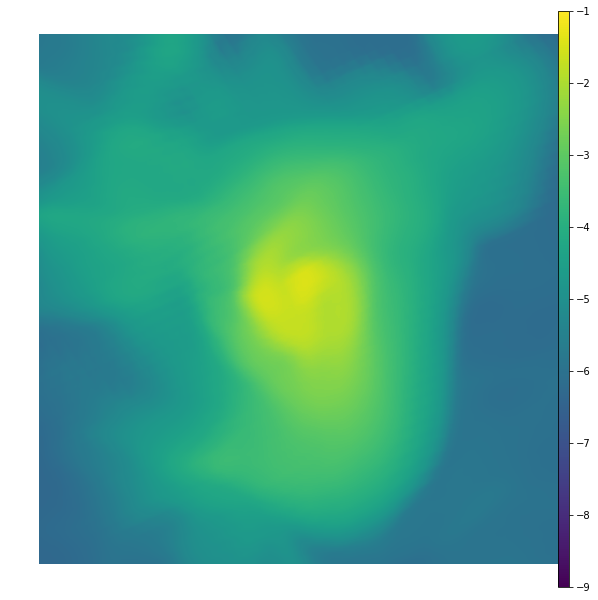

In [32]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
im1 = ax.imshow(np.log10(sat_dens_1), vmin = -9, vmax = -1)
cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")

ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)






In [34]:
kern = Gaussian2DKernel(10)
sat_mstar_dens_1_c = yt.YTArray(convolve_fft(sat_mstar_dens_1, kern), sat_mstar_dens_1.units)


/anaconda2/lib/python2.7/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/anaconda2/lib/python2.7/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


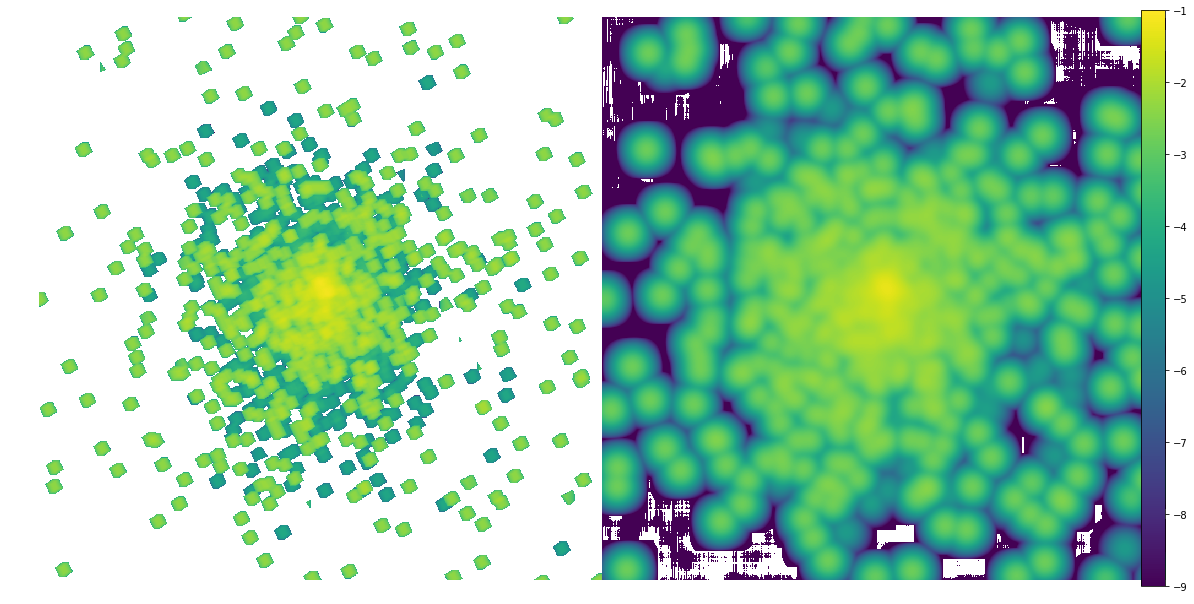

In [35]:
fig, axes = plt.subplots(1,2, figsize = (17.,8))
im1 = axes[0].imshow(np.log10(sat_mstar_dens_1), vmin = -9, vmax = -1)
im2 = axes[1].imshow(np.log10(sat_mstar_dens_1_c), vmin = -9, vmax = -1)



cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im2, cax=cax,orientation="vertical")


for ax in axes.ravel():
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)



In [36]:
anch_force_1 = 2 * pi * G * sat_dens_1 * sat_mstar_dens_1_c

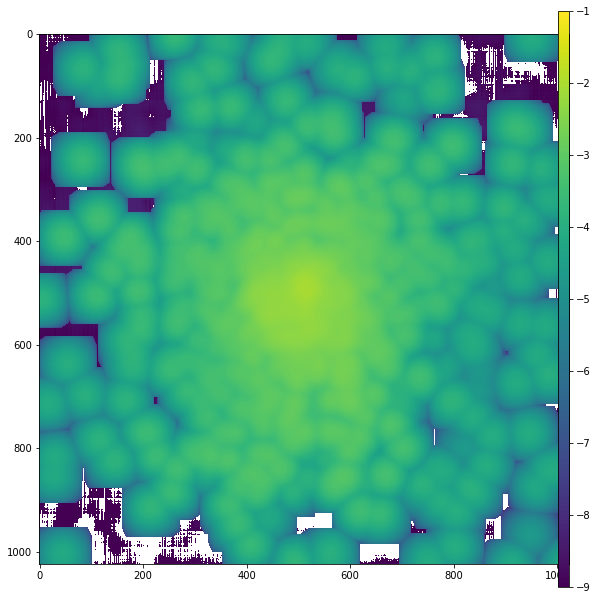

In [37]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
im1 = ax.imshow(np.log10(anch_force_1),vmin = -30, vmax = -6)

cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im2, cax=cax,orientation="vertical")


for ax in axes:
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)






In [38]:
vel_1_dens = frb1["gas", "density"]
ram_pres_1 = vel_1_dens * vel_1_L**2.


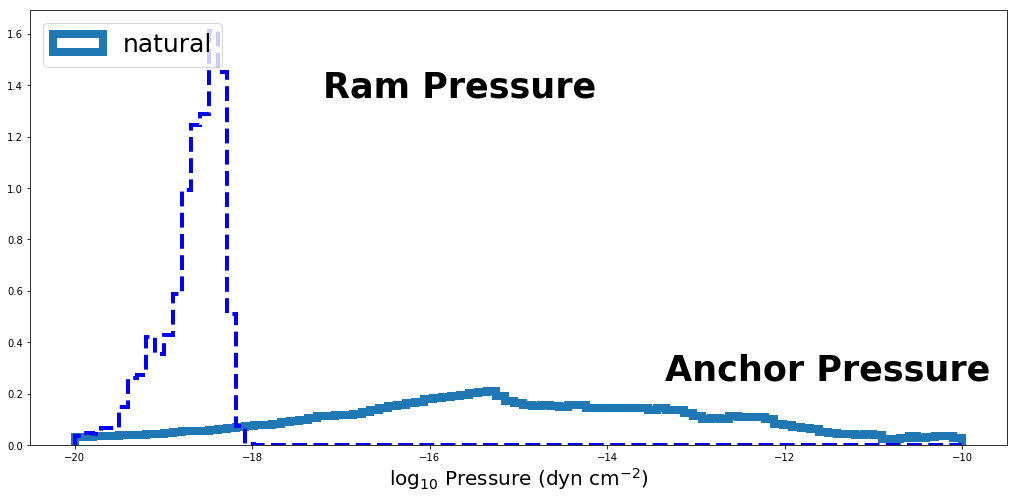

In [39]:
fig, axes = plt.subplots(1,1, figsize = (17.5,8))



anch_force_1_rav = anch_force_1.to('dyn/cm**2').value.ravel()
anch_force_1_rav = anch_force_1_rav[~isnan(anch_force_1_rav)]

ram_pres_1_rav = ram_pres_1.to('dyn/cm**2').value.ravel()
ram_pres_1_rav = ram_pres_1_rav[~isnan(ram_pres_1_rav)]




bns = linspace(-20, -10, 100)

axes.hist(log10(anch_force_1_rav[anch_force_1_rav > 0]), histtype = 'step', label = 'natural', linewidth = 8, normed = True, bins = bns)
legend(loc = 2,  fontsize = 25)


axes.hist(log10(ram_pres_1_rav), histtype = 'step', linewidth = 4, linestyle = 'dashed', color = 'blue', normed = True, bins = bns)


axes.annotate('Ram Pressure', (0.3, 0.8), fontsize = 35, xycoords = 'axes fraction', color = 'black', fontweight = 'bold')
axes.annotate('Anchor Pressure', (0.65, 0.15), fontsize = 35, xycoords = 'axes fraction', color = 'black', fontweight = 'bold')


axes.set_xlabel(r'$\log_{10}$ Pressure (dyn cm$^{-2}$)', fontsize = 20)


fig.savefig('pressure_comparison.png', dpi = 400)




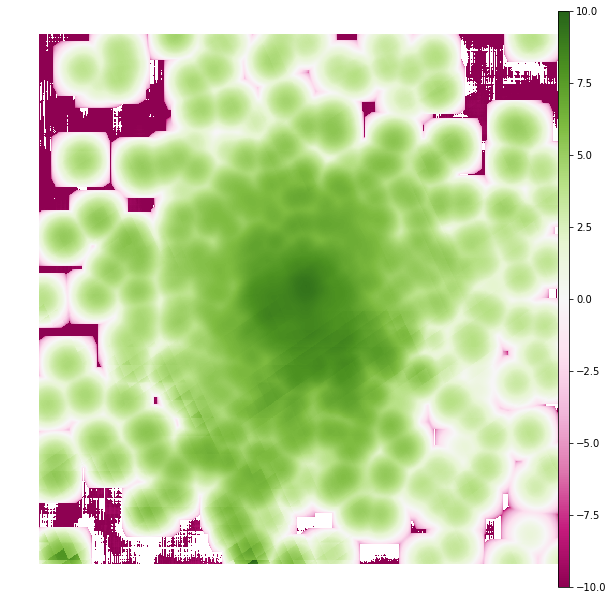

In [40]:
fig, ax = plt.subplots(1,1, figsize = (8.,8))

rat1 = anch_force_1/ram_pres_1

im1 = ax.imshow(log10(rat1), vmin = -10, vmax = 10., cmap = 'PiYG')


cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")

ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)


